In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib


# Windows에서 기본 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은고딕
plt.rcParams['axes.unicode_minus'] = False     # 음수(-) 기호 깨짐 방지

age_group
매우 젊음       850
젊음          842
중간 이하      1488
중간 이상      2896
나이 듦       4146
매우 나이 듦    3430
Name: count, dtype: int64


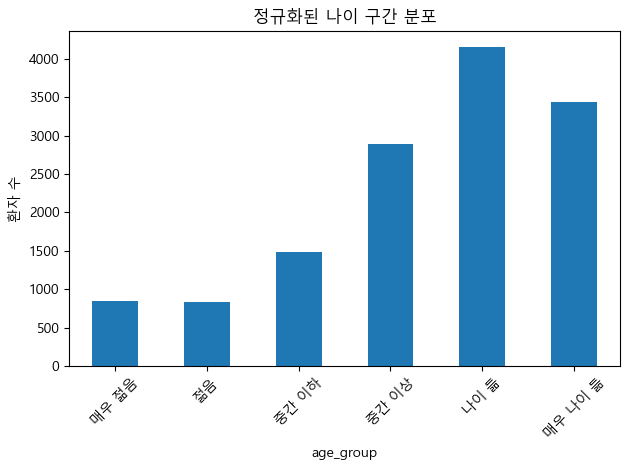

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset/heg_sample_data.csv')

# 나이 정규화 값 기준으로 구간 나누기
bins = [-np.inf, -1.0, -0.5, 0, 0.5, 1.0, np.inf]
labels = ['매우 젊음', '젊음', '중간 이하', '중간 이상', '나이 듦', '매우 나이 듦']

# 나이 구간별 그룹 생성
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# 각 구간별 환자 수 확인
age_group_counts = df['age_group'].value_counts().sort_index()
print(age_group_counts)

# 바 차트로 시각화
age_group_counts.plot(kind='bar', title='정규화된 나이 구간 분포', ylabel='환자 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


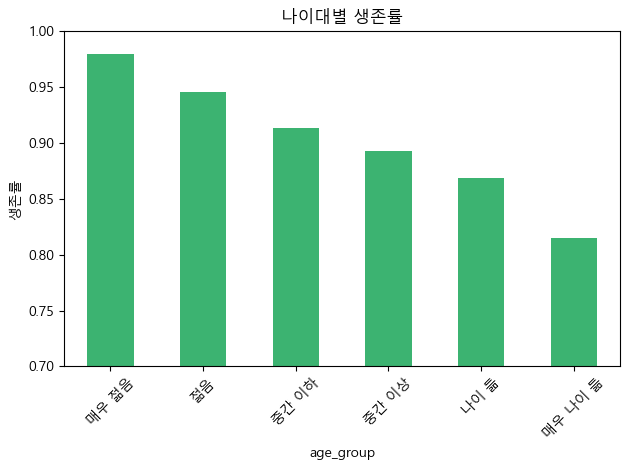

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 나이 그룹화
bins = [-np.inf, -1.0, -0.5, 0, 0.5, 1.0, np.inf]
labels = ['매우 젊음', '젊음', '중간 이하', '중간 이상', '나이 듦', '매우 나이 듦']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# 생존률 계산: 1 - 사망률
survival_rate = 1 - df.groupby('age_group', observed=True)['outcome'].mean()

# 시각화
survival_rate.plot(kind='bar', color='mediumseagreen', title='나이대별 생존률', ylabel='생존률', rot=45)
plt.ylim(0.7, 1)
plt.tight_layout()
plt.show()


